# 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

# 2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

### Import Necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import data as dataframe

In [2]:
data= pd.read_csv("D:\Study\Data Science\Python\ineuron\Data_Set\Student_dataset\stud.csv")
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Show the shape of the dataset

In [3]:
data.shape

(1000, 8)

## 3.  Dataset information

Dataset contains following features
1. gender -> It determines the gender of the Student
2. race/ethnicity -> It determines the different groups from A to E to which student belongs too
3. Parental Level of Education -> It determines the education of Parent for each student
4. Lunch -> It determines what kind of lunch students were taking, whether its Standard or free
5. Test Preparation Course -> Whehter student had completed the test preparation course  or not
6. Maths Score -> Maths score of each student
7. Reading Score -> Reading score of each student
8. Writing Score -> Writing score of each student




### 4. Data Checks to perform
1. Check Missing values
2. Check Duplicates
3. Check data type
4. Check the number of unique values of each column
5. Check statistics of data set
6. Check various categories present in the different categorical column

#### 4.1 To Check if any features has null values in it


In [4]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

####  Remarks : There are no Missing Values in any of the features

#### 4.2 To Check for duplicates

In [5]:
data.duplicated().sum()

0

####  Remarks : There are no duplicate rows in the dataset

#### 4.3 To Check datatypes of each features

In [6]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 4.4 Check the number of unique values of each column

In [7]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [8]:
# Different values in Race/Ethnicity
data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [9]:
# Different values in parental level of education
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [10]:
# Different values in lunch
data['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [11]:
# Different values in test preparation course
data['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

#### 4.5. Check statistics of data set

In [12]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Remarks:
    1. All numerical values have mean between 66 and 69
    2. Standard deviation for numerical values lines betwenn 14.5 and 15.20
    3. Maths has minimum score of 0 and Maximum of 100
    4. Reading has minimum score of 17 and maximum of 100
    5. Writing has minimum score of 10 amd maximum of 100

### 4.6 Segregating the data based on datatype

In [13]:
data[data.dtypes[data.dtypes=='object'].index].head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [14]:
data[data.dtypes[data.dtypes!='object'].index].head(5)

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [15]:
data_numerical=[]
for feature in data.columns:
    if data[feature].dtype != 'O':
        data_numerical.append(feature) 

        
        
data_categorical=[]
for feature in data.columns:
    if data[feature].dtype == 'O':
        data_categorical.append(feature) 

In [16]:
data_numerical

['math score', 'reading score', 'writing score']

In [17]:
data_categorical

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [18]:
# define numerical & categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


#### 4.7 Creating 2 new feature ,Total Score(sum of 3 score features) and Average score

In [19]:
data['Total'] = data['math score'] + data['reading score'] + data['writing score']
data['Average'] = data['Total']/3
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


#### 4.8  Printing Top Scores

In [20]:
print(f"Number of Students who has scored 100 in any one the subjects :{data[(data['math score']==100) |(data['reading score']== 100) | (data['writing score']== 100)]['gender'].count()}")
data[(data['math score']==100) |(data['reading score']== 100) | (data['writing score']== 100)]

Number of Students who has scored 100 in any one the subjects :23


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,Average
106,female,group D,master's degree,standard,none,87,100,100,287,95.666667
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.666667
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,97.666667
165,female,group C,bachelor's degree,standard,completed,96,100,100,296,98.666667
179,female,group D,some high school,standard,completed,97,100,100,297,99.000000
377,female,group D,master's degree,free/reduced,completed,85,95,100,280,93.333333
381,male,group C,associate's degree,standard,completed,87,100,95,282,94.000000
403,female,group D,high school,standard,completed,88,99,100,287,95.666667
451,female,group E,some college,standard,none,100,92,97,289,96.333333
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000


In [21]:
print(f"Number of students who has scored 100 in both Maths and Reading are {data[(data['math score']==100) & (data['reading score']== 100)]['gender'].count()}")
data[(data['math score']==100) & (data['reading score']== 100)]

Number of students who has scored 100 in both Maths and Reading are 4


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,Average
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,97.666667
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.000000
962,female,group E,associate's degree,standard,none,100,100,100,300,100.000000


In [22]:
print(f"Number of students who has scored 100 in all 3 subjects are {data[(data['math score']==100) & (data['reading score']== 100) & (data['writing score']== 100)]['gender'].count()}")
data[(data['math score']==100) & (data['reading score']== 100) & (data['writing score']== 100)]

Number of students who has scored 100 in all 3 subjects are 3


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,Average
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.0
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.0
962,female,group E,associate's degree,standard,none,100,100,100,300,100.0


### 5. Graphical Visualization of Data
1. Histogram
2. Kernel Distribution Function(KDE)

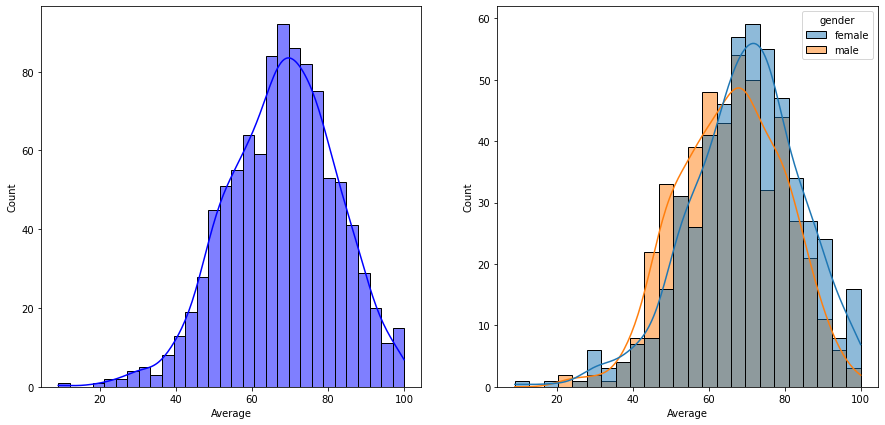

In [23]:
fig, axs = plt.subplots(1,2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='Average',bins=30,kde=True,color='b')
plt.subplot(122)
sns.histplot(data=data,x='Average',kde=True,hue='gender')
plt.show()

#### Remarks : 
    1.Girls tend to have better score than Boys

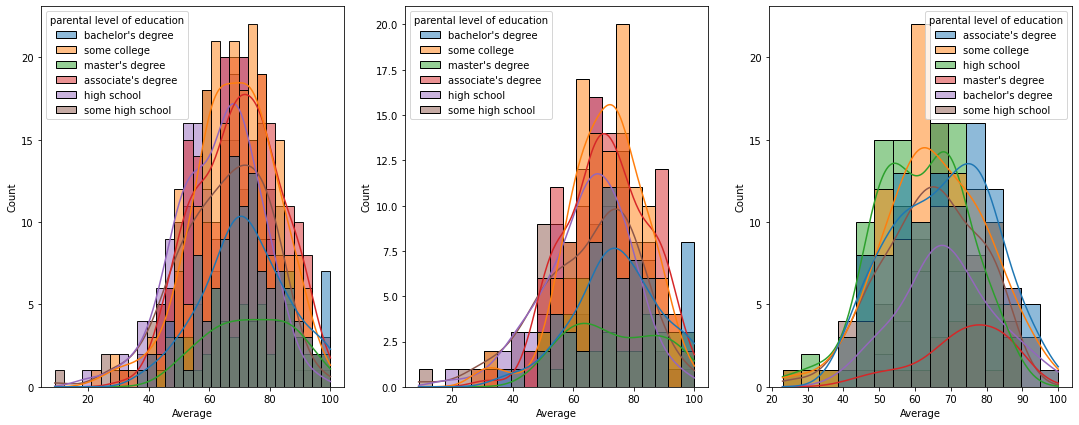

In [24]:
fig, axs = plt.subplots(1,3, figsize=(25, 7))
plt.subplot(141)
sns.histplot(data=data,x='Average',bins=30,kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'],x='Average',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'],x='Average',kde=True,hue='parental level of education')
plt.show()

#### Remarks
1. In general parent's education don't help student perform well in exam.
2. 2nd plot we can see there is no effect of parent's education on female students.
3. 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam


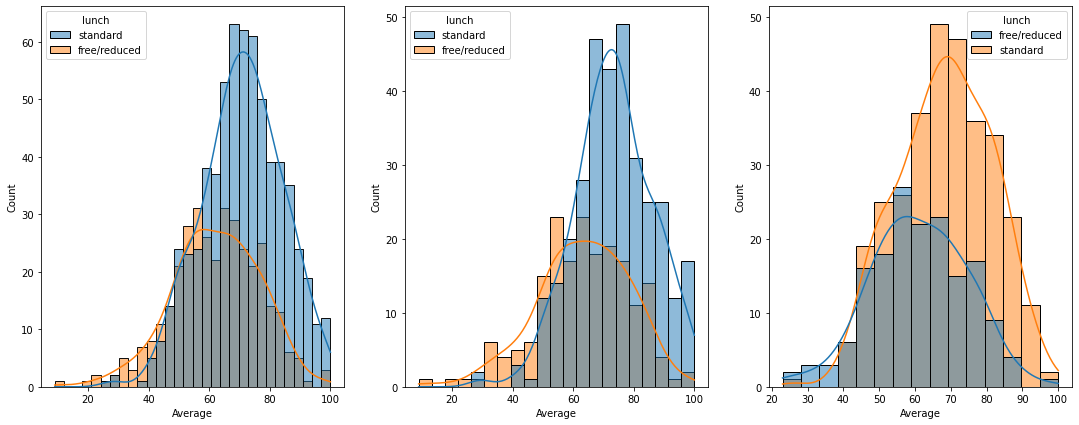

In [25]:
fig, axs = plt.subplots(1,3, figsize=(25, 7))
plt.subplot(141)
sns.histplot(data=data,x='Average',bins=30,kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'],x='Average',kde=True,hue='lunch')
plt.show()

#### Remarks
1. In general lunch seems to have impact on test score
2. As per Graph 2 Girls who has got more marks had lunch before giving exam
3. As per graph 3 Boys who had scored better marks seems to have had lunch too


### 5.1 Create Violin plot of Scores

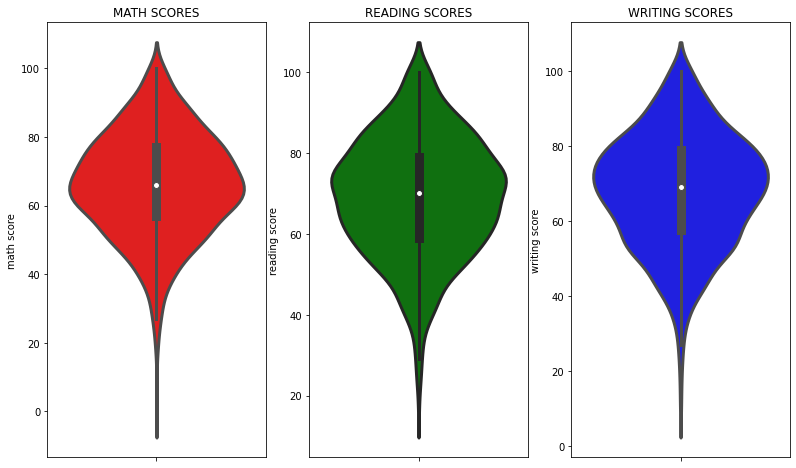

In [26]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=data,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=data,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=data,color='blue',linewidth=3)
plt.show()

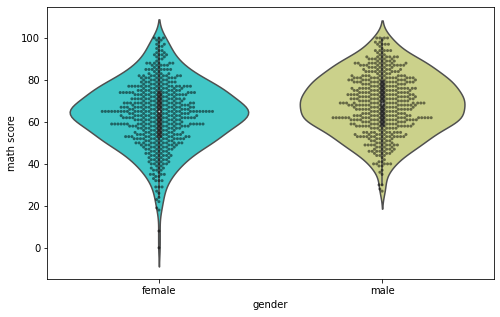

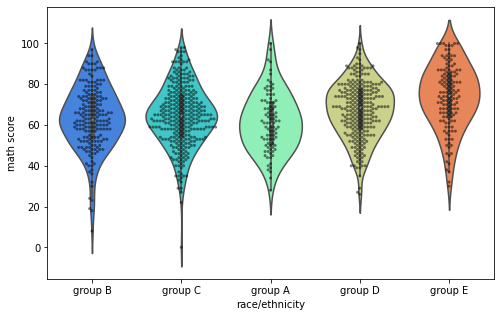

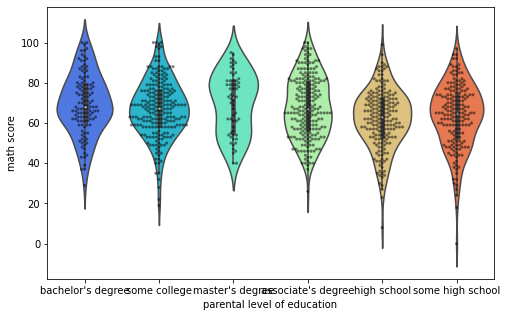

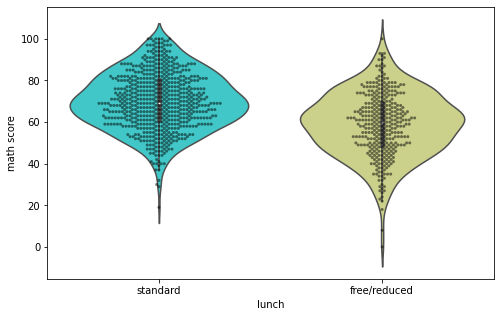

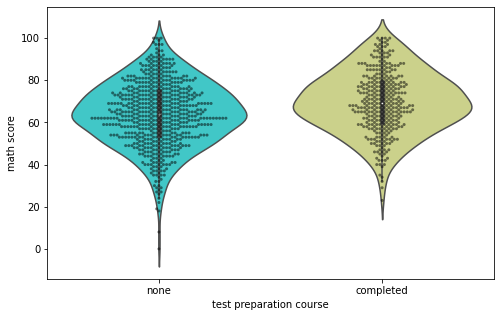

In [42]:
for x in data.columns[:5]:
    plt.figure(figsize=(8,5))
    sns.violinplot(x=x, y="math score", data=data,palette='rainbow')
    sns.swarmplot(x=x, y="math score", data=data,color='black',alpha=0.5,size=3)
    plt.show()
    print('\n')

#### Observations
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### 5.2 Multivariate analysis using pieplot

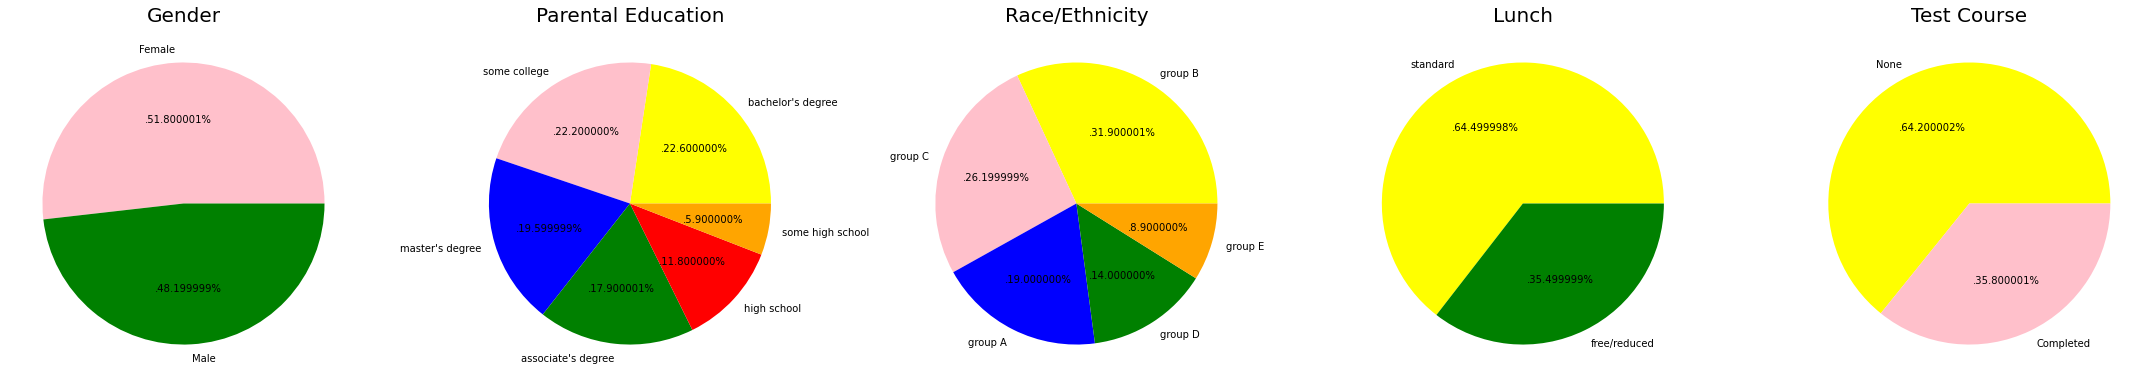

In [28]:
plt.rcParams['figure.figsize'] = (30, 12)

#generating plot for gender

plt.subplot(1, 5, 1)
size = data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['pink','green']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)




# generating plot for Parental Level of Education
plt.subplot(1, 5, 2)
size = data['parental level of education'].value_counts()
labels = "bachelor's degree", 'some college', "master's degree","associate's degree", 'high school', 'some high school'
color = "yellow","pink","blue", "green","red","orange"
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)


# generating plot for Race/Ethnicity
plt.subplot(1, 5, 3)
size = data['race/ethnicity'].value_counts()
labels = 'group B', 'group C', 'group A', 'group D', 'group E'
color = "yellow","pink","blue", "green","orange"
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)



# generating plot for lunch
plt.subplot(1, 5, 4)
size = data['lunch'].value_counts()
labels = "standard", 'free/reduced'
color = "yellow", "green"
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)



plt.subplot(1, 5, 5)
size = data['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['Yellow','pink']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()
plt.show()

#### Observations
1. we have more female in class compared to Male
2. Parents education maximum level is Some college followed by Bachelor Degrees
3. Group B tops the Ethnicity group followed by Group C
4. There are 64% of Students  who had standard lunch
5. Only 35% students have taken test preparation course

### 5.3 Feature Wise Visualization
#### 5.3.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

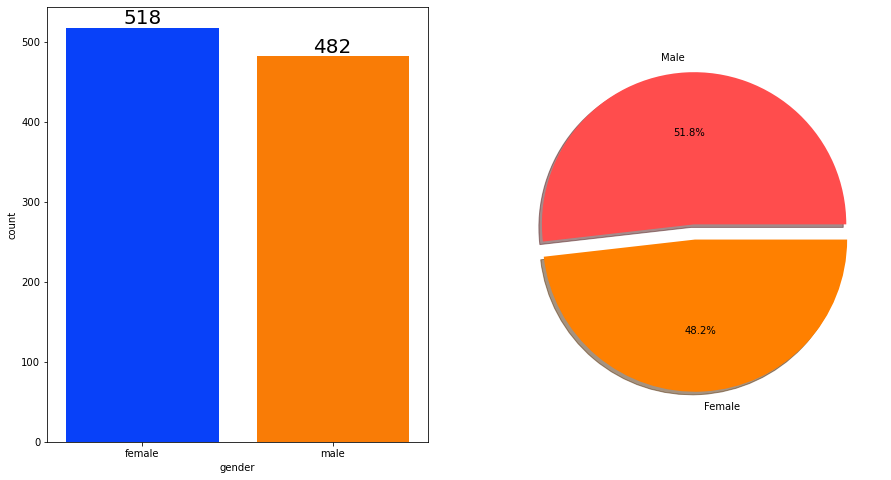

In [29]:
f,ax =plt.subplots(1,2,figsize=(15,8))
sns.countplot(x=data['gender'],data=data,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=data['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Observations
1. Female students are more than Male students

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [30]:
gender_group = data.groupby('gender').mean()
gender_group

,math score,reading score,writing score,Total,Average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


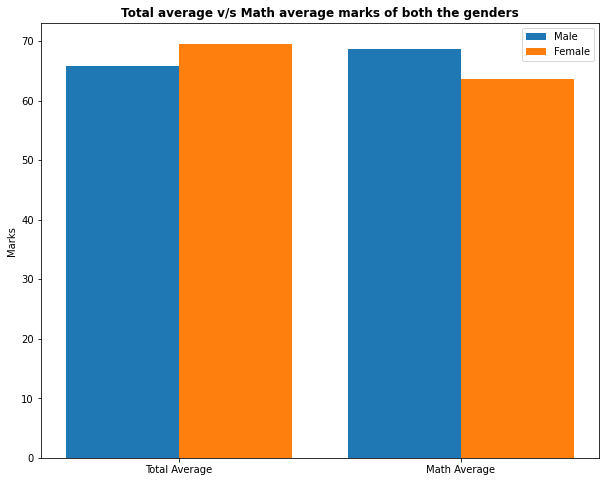

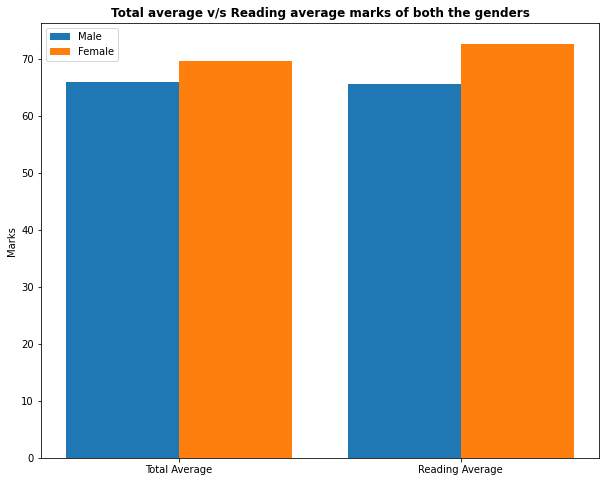

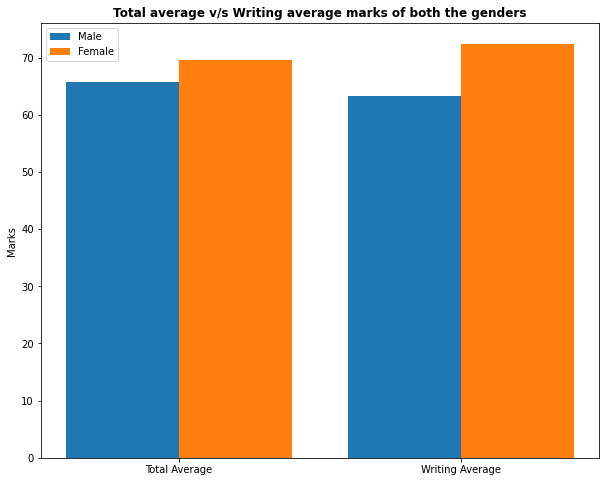

In [31]:
#Plotting graph for Maths Score

plt.figure(figsize=(10, 8))
X = ['Total Average','Math Average']
female_scores = [gender_group['Average'][0], gender_group['math score'][0]]
male_scores = [gender_group['Average'][1], gender_group['math score'][1]]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female') 
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#Plotting graph for Reading Score
plt.figure(figsize=(10, 8))
X = ['Total Average','Reading Average']
female_scores = [gender_group['Average'][0], gender_group['reading score'][0]]
male_scores = [gender_group['Average'][1], gender_group['reading score'][1]]
X_axis = np.arange(len(X))  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Reading average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#Plotting graph for Writing Score
plt.figure(figsize=(10, 8))
X = ['Total Average','Writing Average']
female_scores = [gender_group['Average'][0], gender_group['writing score'][0]]
male_scores = [gender_group['Average'][1], gender_group['writing score'][1]]
X_axis = np.arange(len(X))  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Writing average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Observations
1. Female has done good in Reading and Writing but Male has done better in Maths

### 5.3.2 RACE/EHNICITY COLUMN
1. How is Group wise distribution ?
2. Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

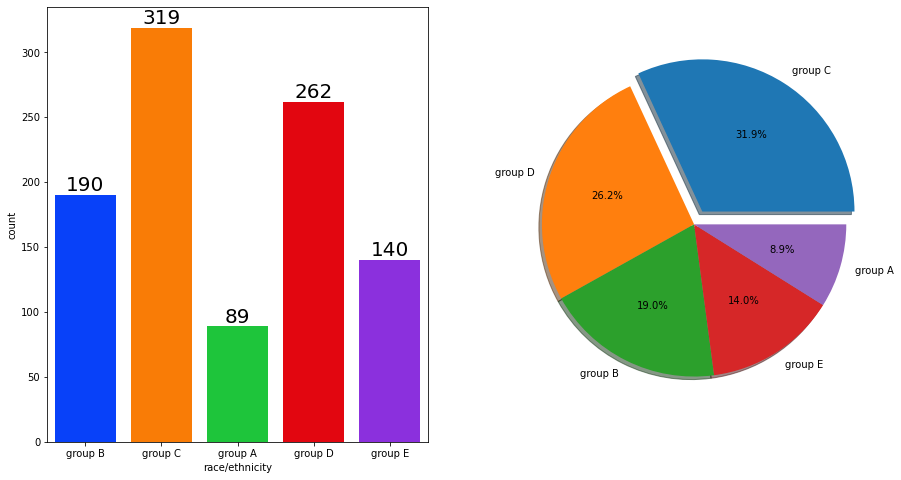

In [32]:
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.countplot(x=data['race/ethnicity'],data=data,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = data['race/ethnicity'].value_counts(),labels=data['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

#### Observations
1. Group C tops the list of Ethnicity with 31.9% followed closerly by Group D
2. Group A has the least count

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

In [33]:
ethnicity_group = data.groupby('race/ethnicity').mean()
ethnicity_group

,math score,reading score,writing score,Total,Average
race/ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


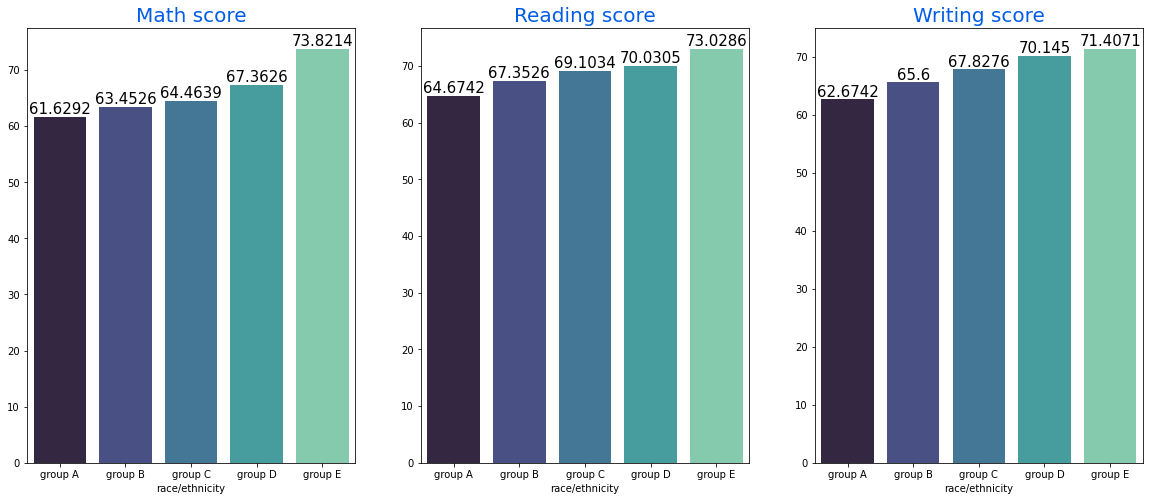

In [34]:


f,ax=plt.subplots(1,3,figsize=(20,8))

#Plotting graph for Maths Score
sns.barplot(x=ethnicity_group['math score'].index,y=ethnicity_group['math score'].values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
    
#Plotting graph for reading Score
sns.barplot(x=ethnicity_group['reading score'].index,y=ethnicity_group['reading score'].values,palette = 'mako',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)
    
    
#Plotting graph for reading Score
sns.barplot(x=ethnicity_group['writing score'].index,y=ethnicity_group['writing score'].values,palette = 'mako',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### Observations
1. Group E tops the list of Ethnicity scoring well in Reading, writing and Math score
2. Group A has the least scores

### 5.3.3 PARENTAL LEVEL OF EDUCATION COLUMN
1. What is educational background of student's parent ?
2. Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Parental Education wise distribution ?)

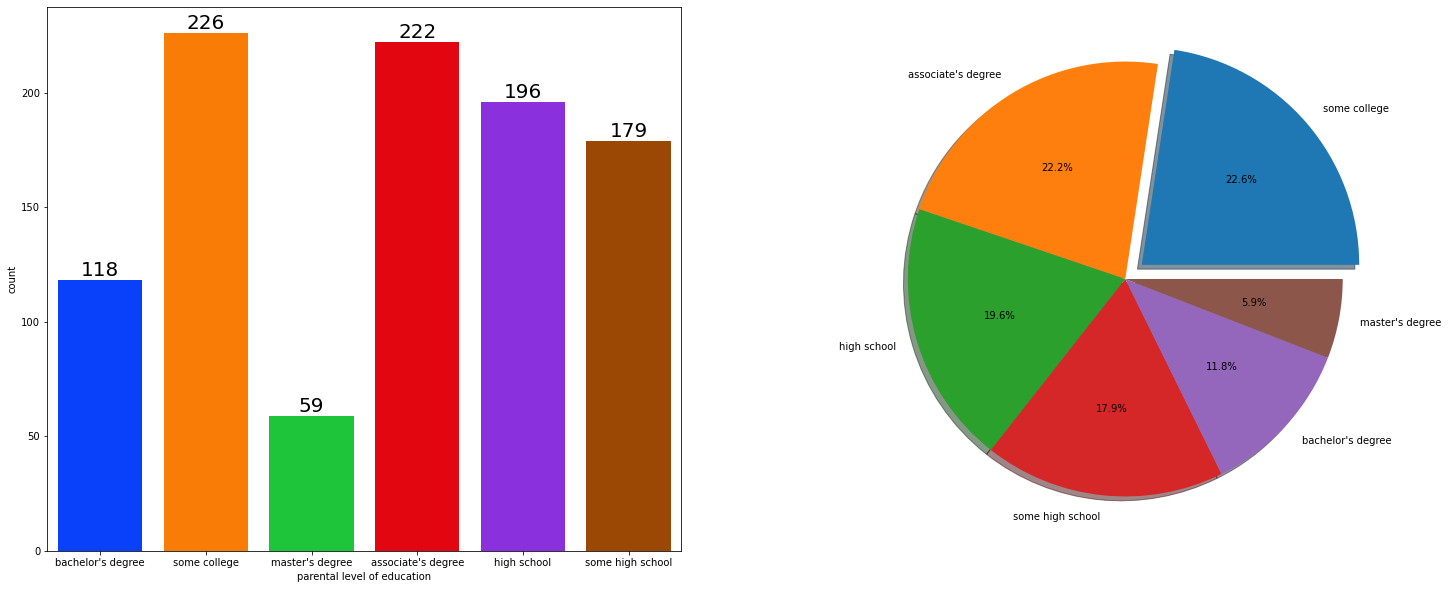

In [35]:
f,ax=plt.subplots(1,2,figsize=(25,10))
sns.countplot(x=data['parental level of education'],data=data,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = data['parental level of education'].value_counts(),labels=data['parental level of education'].value_counts().index,explode=[0.1,0,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

### Observations
1. Maximum Parents have some college level of education followed by Associate Degree
2. Parents having Master degree count is the least amon the group with just 5.9%

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

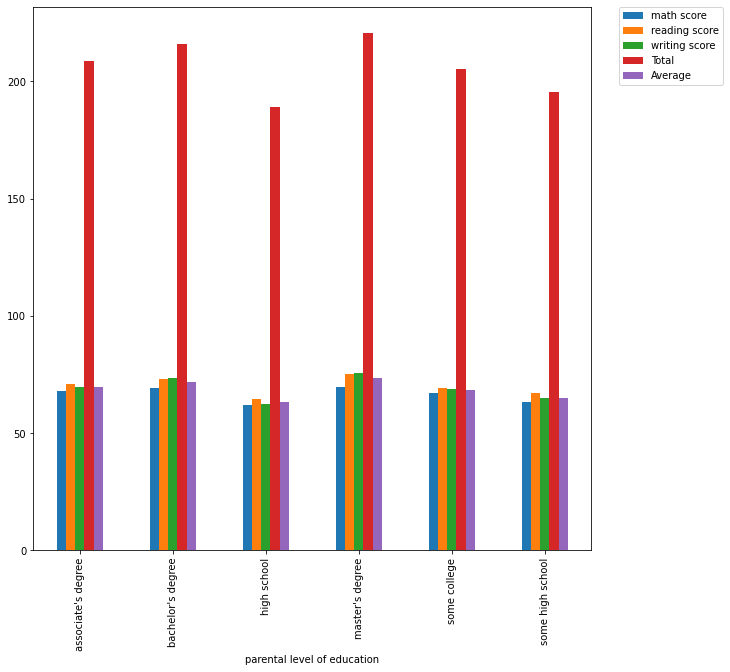

In [36]:
data.groupby('parental level of education').agg('mean').plot(kind='bar',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Observations
1. Students whose Parents has Master degrees have performed well in Maths, Reading and Writing 

### 5.3.4 CHECKING OUTLIERS

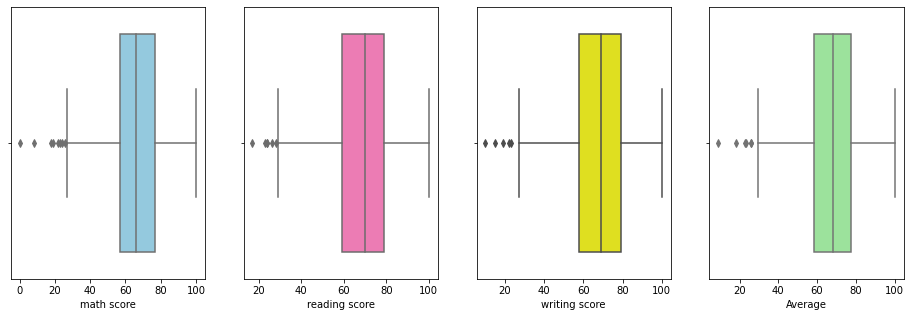

In [37]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(data['Average'],color='lightgreen')
plt.show()

#### Observations 
1. Math has the most outliers compared to other scores

### 5.3.5 MUTIVARIATE ANALYSIS USING PAIRPLOT

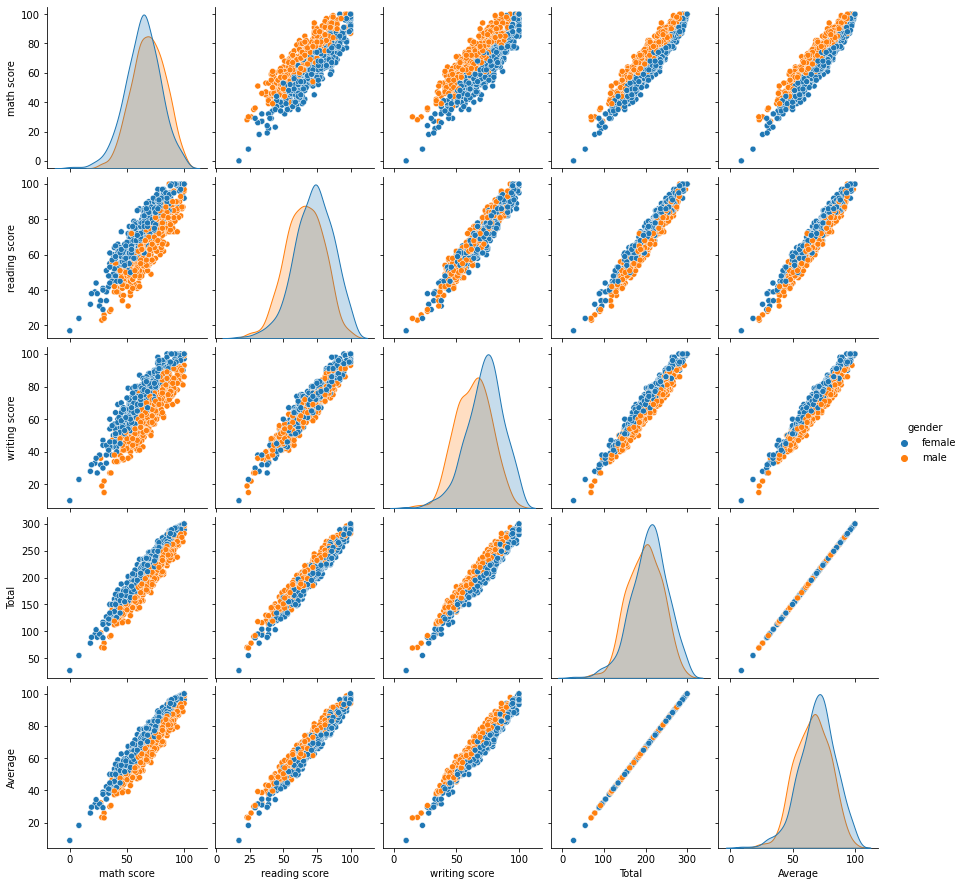

In [38]:
sns.pairplot(data,hue = 'gender')
plt.show()

#### Insights
1. From the above plot it is clear that all the scores increase linearly with each other.

## 6. Conclusions
1. Student's Performance is related with lunch, race, parental level education
2. Females lead in pass percentage and also are top-scorers
3. Student's Performance is not much related with test preparation course
4. Finishing preparation course is benefitial.